# Análise Exploratória: Carga de Energia

Este notebook realiza uma análise exploratória dos dados de carga de energia. Ele cobre:
1. Carregamento e limpeza dos dados a partir de um arquivo CSV (ou ODS).
2. Preparação dos dados para análise de séries temporais.
3. Geração de visualizações para entender tendências, sazonalidades e distribuições com foco semanal.

### Para a instalação dos requerimentos
Caso rodando localmente, é recomendado utilizar um Ambiente Virtual. Caso no *Google Colab*, remova os comentários do código seguinte.

In [ ]:
!wget -q https://raw.githubusercontent.com/AndreKoraleski/PADfinalPrevDemanda/main/Data%20Visualization/requirements.txt
!wget -q https://github.com/AndreKoraleski/PADfinalPrevDemanda/raw/main/Data%20Visualization/CARGA_ENERGIA.ods
!pip install -r 'requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=6cca6711df3418794740bad9aacd86221edfac81ac250ae4d93f2342b74886fa
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


## Passo 1: Configuração e Carregamento dos Dados

Primeiro, importamos as bibliotecas necessárias (`pandas`, `matplotlib`, `seaborn`) e carregamos os dados do arquivo `DADOS_BRUTOS_INPUTADO.csv`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

caminho_arquivo = 'DADOS_BRUTOS_INPUTADO.csv'

try:
    # FIXME: Não funciona bem usar o arquivo provido, usando .ods ao invés
    # df = pd.read_csv(caminho_arquivo, sep=';', thousands='.', decimal=',')
    df = pd.read_excel('CARGA_ENERGIA.ods', thousands='.', decimal=',')
    print("Arquivo carregado e números interpretados com sucesso!")

    df.columns = df.columns.str.strip()

    df['din_instante'] = pd.to_datetime(df['din_instante'], format='mixed', dayfirst=True)

    df['val_cargaenergiamwmed'] = df['val_cargaenergiamwmed'].ffill()

    print("Dados limpos e preparados!")

    print("\nAmostra dos dados carregados corretamente:")
    print(df.head())

    print("\nInformações do DataFrame (observe os tipos de dados corretos):")
    df.info()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo: {e}")

display(df)

Arquivo carregado e números interpretados com sucesso!
Dados limpos e preparados!

Amostra dos dados carregados corretamente:
  id_subsistema        nom_subsistema din_instante  val_cargaenergiamwmed
0             N                 Norte   2000-01-01            2243.512500
1            NE              Nordeste   2000-01-01            4646.370833
2             S                   Sul   2000-01-01            4800.650000
3            SE  Sudeste/Centro-Oeste   2000-01-01           19045.995833
4             N                 Norte   2000-01-02            2259.808333

Informações do DataFrame (observe os tipos de dados corretos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37165 entries, 0 to 37164
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_subsistema          37165 non-null  object        
 1   nom_subsistema         37165 non-null  object        
 2   din_instante     

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,Norte,2000-01-01,2243.512500
1,NE,Nordeste,2000-01-01,4646.370833
2,S,Sul,2000-01-01,4800.650000
3,SE,Sudeste/Centro-Oeste,2000-01-01,19045.995833
4,N,Norte,2000-01-02,2259.808333
...,...,...,...,...
37160,SE,Sudeste/Centro-Oeste,2025-06-07,44656.721667
37161,N,Norte,2025-06-08,44656.721667
37162,NE,Nordeste,2025-06-08,44656.721667
37163,S,Sul,2025-06-08,44656.721667


## Passo 2: Preparação dos Dados

Aqui, realizamos etapas cruciais de pré-processamento:
- Garantir que a coluna de data esteja no formato `datetime` correto.
- Limpar nomes de colunas para remover espaços extras.
- Lidar com valores ausentes (se houver).
- Definir a coluna `din_instante` como o índice do DataFrame para facilitar a análise temporal.

In [ ]:
# Defina o ano de início e fim para a filtragem
start_year = 2014
end_year = 2025

print("--- PASSO DE DIAGNÓSTICO E PREPARAÇÃO ---")

print("Nomes das colunas originais:", df.columns.tolist())

df.columns = df.columns.str.strip().str.strip('\"')
print("Nomes das colunas após limpeza:", df.columns.tolist())
print("-"*50)

coluna_data = 'din_instante'
coluna_valor = 'val_cargaenergiamwmed'
coluna_subsistema = 'nom_subsistema'

try:
    print(f"Convertendo a coluna de data: '{coluna_data}'")
    df[coluna_data] = pd.to_datetime(df[coluna_data], format='mixed', dayfirst=True)

    valores_ausentes_antes = df[coluna_valor].isnull().sum()
    if valores_ausentes_antes > 0:
        df = df.dropna(subset=[coluna_valor])
        print(f"{valores_ausentes_antes} linhas com valores ausentes foram removidas.")

    # Filtrar pelo intervalo de anos
    print(f"Filtrando dados para o período de {start_year} a {end_year}...")
    df = df[(df[coluna_data].dt.year >= start_year) & (df[coluna_data].dt.year <= end_year)]
    print(f"Dados filtrados para o período de {start_year} a {end_year}.")

    df.set_index(coluna_data, inplace=True)

    print("\nDados preparados e indexados pela data!")
    df.info()

except KeyError as e:
    print(f"\nERRO: A coluna {e} não foi encontrada!")
    print("Por favor, verifique a saída 'Nomes das colunas após limpeza' acima e corrija o nome da variável correspondente nesta célula.")

except Exception as e:
    print(f"\nOcorreu um erro inesperado durante a preparação dos dados: {e}")

display(df)

--- PASSO DE DIAGNÓSTICO E PREPARAÇÃO ---
Nomes das colunas originais: ['id_subsistema', 'nom_subsistema', 'din_instante', 'val_cargaenergiamwmed']
Nomes das colunas após limpeza: ['id_subsistema', 'nom_subsistema', 'din_instante', 'val_cargaenergiamwmed']
--------------------------------------------------
Convertendo a coluna de data: 'din_instante'
Filtrando dados para o período de 2014 a 2025...
Dados filtrados para o período de 2014 a 2025.

Dados preparados e indexados pela data!
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16708 entries, 2014-01-01 to 2025-06-08
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_subsistema          16708 non-null  object 
 1   nom_subsistema         16708 non-null  object 
 2   val_cargaenergiamwmed  16708 non-null  float64
dtypes: float64(1), object(2)
memory usage: 522.1+ KB


,id_subsistema,nom_subsistema,val_cargaenergiamwmed
din_instante,,,
2014-01-01,N,Norte,4629.206875
2014-01-01,NE,Nordeste,8104.899167
2014-01-01,S,Sul,8451.914116
2014-01-01,SE,Sudeste/Centro-Oeste,29770.296000
2014-01-02,N,Norte,5204.651667
...,...,...,...
2025-06-07,SE,Sudeste/Centro-Oeste,44656.721667
2025-06-08,N,Norte,44656.721667
2025-06-08,NE,Nordeste,44656.721667


## Passo 3: Criação das Visualizações

Agora, geramos os gráficos para explorar os dados sob diferentes perspectivas.

### Gráfico 1: Carga Total de Energia ao Longo do Tempo
Este gráfico oferece uma visão geral da demanda de energia, reamostrada por 'periodo' para uma linha de tendência mais suave ou mais densa, dependendo da escolha do usuário.

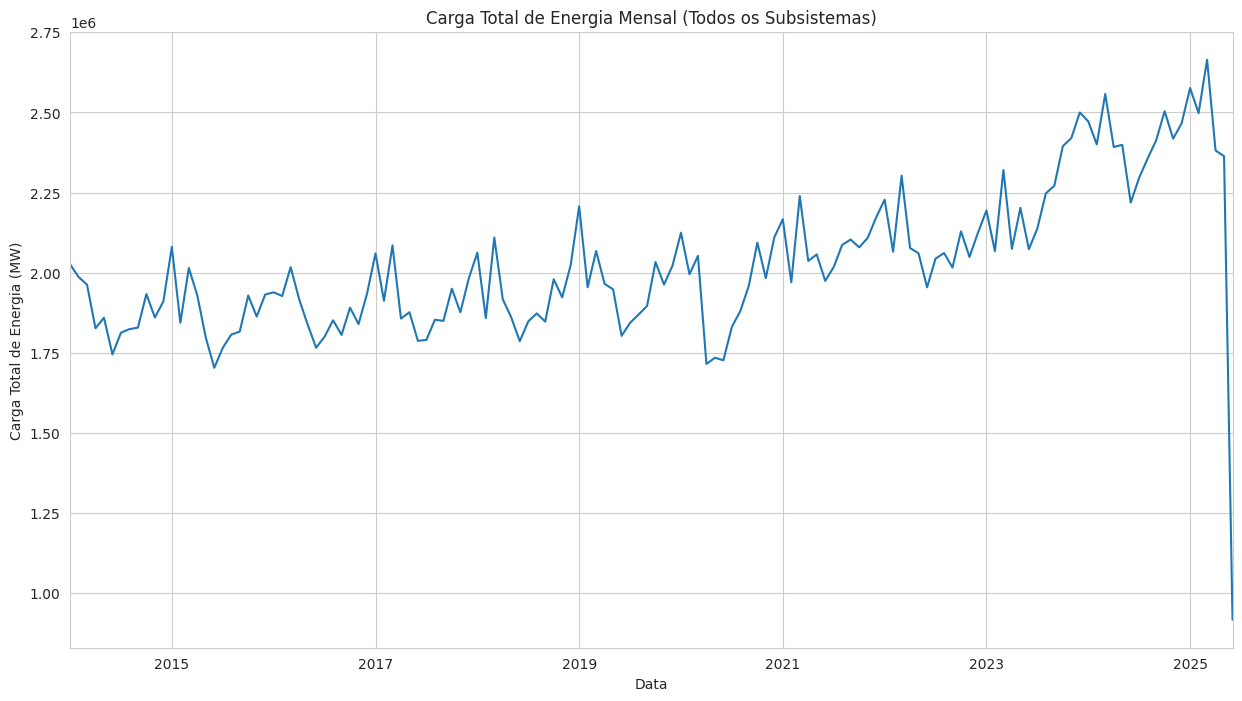

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

# Defina o período desejado: 'D' (Diário), 'W' (Semanal), 'ME' (Mensal)
periodo = 'ME'

# Reamostra os dados por mês ('ME')
df_semanal = df['val_cargaenergiamwmed'].resample(periodo).sum()

df_semanal.plot(title='Carga Total de Energia Mensal (Todos os Subsistemas)')
plt.ylabel('Carga Total de Energia (MW)')
plt.xlabel('Data')
plt.show()

### Gráfico 2: Carga de Energia Diária por Subsistema
Mostra quais subsistemas consomem mais energia e como o consumo deles evoluiu.

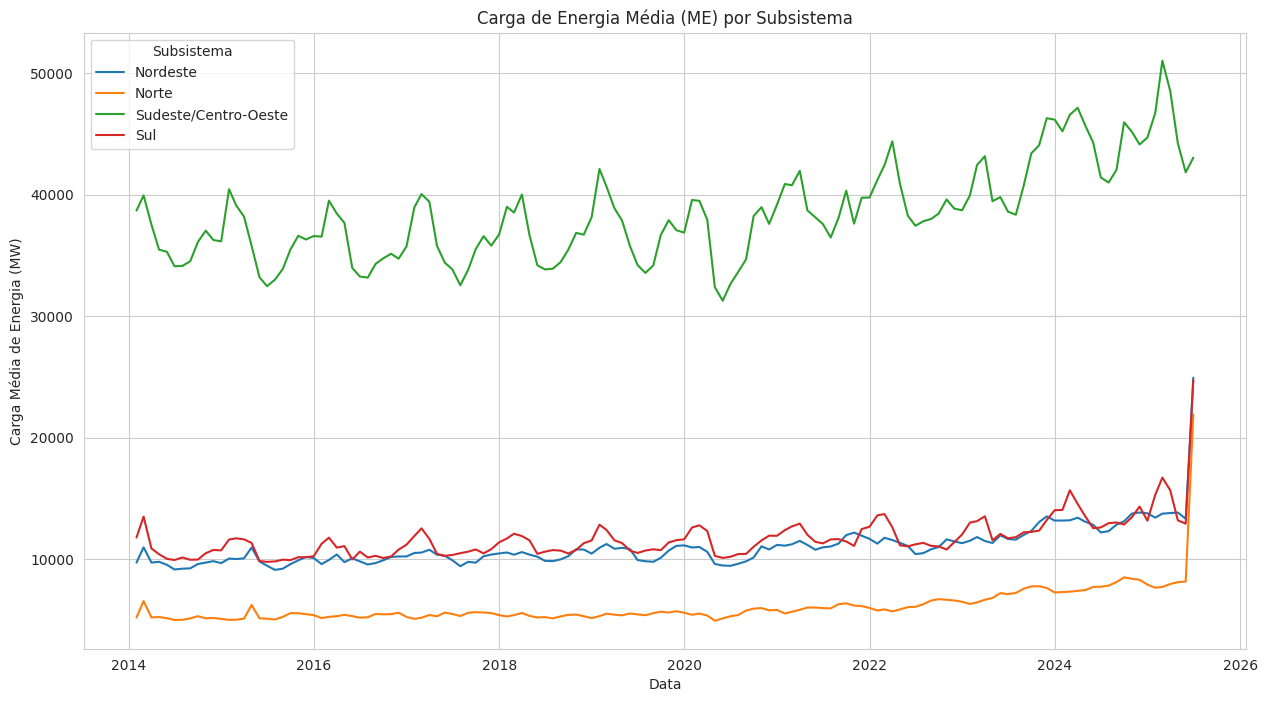

In [ ]:
# Defina o período desejado: 'D' (Diário), 'W' (Semanal), 'ME' (Mensal)
# periodo = 'ME' # Definido anteriormente, pode ser mudado localmente

df_plot = df.groupby('nom_subsistema')['val_cargaenergiamwmed'].resample(periodo).mean().reset_index()

plt.figure()
sns.lineplot(data=df_plot, x=df_plot.columns[1], y='val_cargaenergiamwmed', hue='nom_subsistema')
plt.title(f'Carga de Energia Média ({periodo}) por Subsistema')
plt.ylabel('Carga Média de Energia (MW)')
plt.xlabel('Data')
plt.legend(title='Subsistema')
plt.show()

### Gráfico 3: Distribuição da Carga de Energia por Subsistema
Um boxplot para comparar a distribuição estatística (mediana, quartis, outliers) da carga de energia entre os diferentes subsistemas.

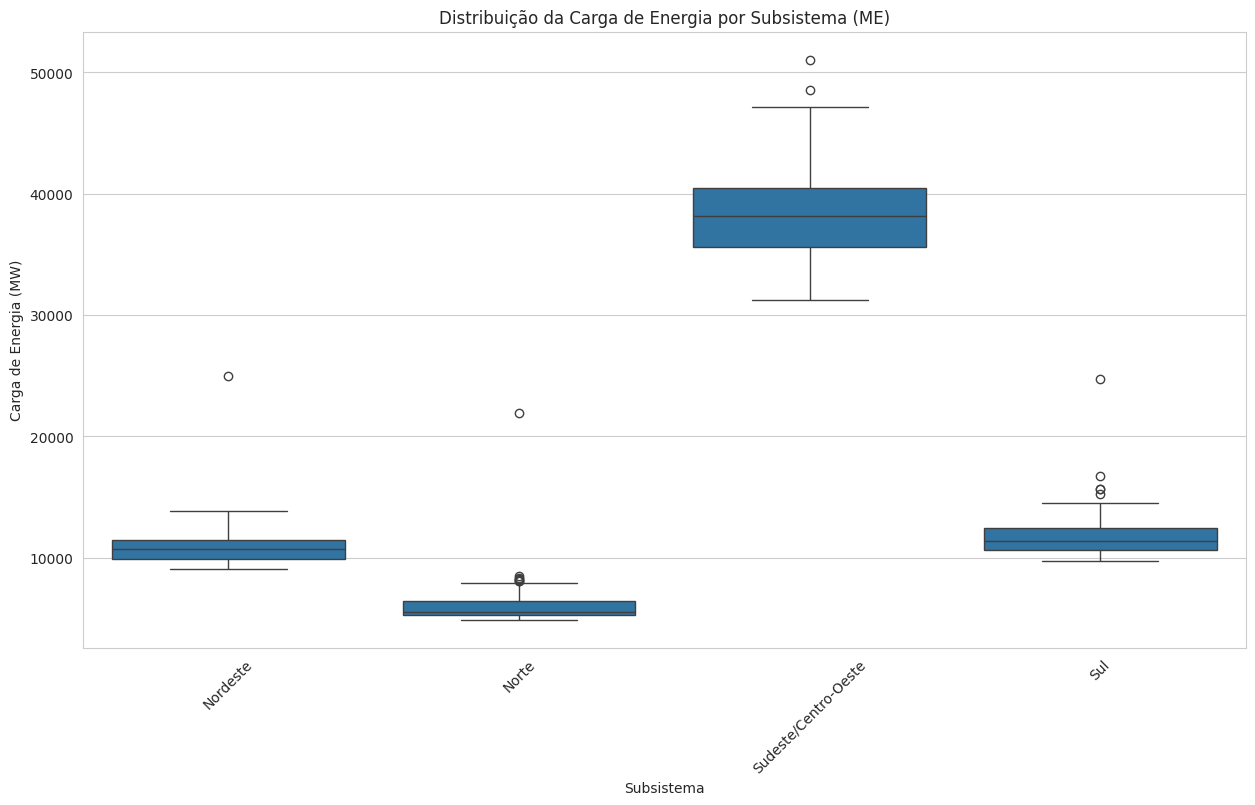

In [ ]:
# Escolha o período: 'D' (dia), 'W' (semana), 'ME' (mês)
# periodo = 'ME' # Definido anteriormente, pode ser mudado localmente

df_box = df.groupby([coluna_subsistema, pd.Grouper(freq=periodo)])[coluna_valor].mean().reset_index()

plt.figure()
sns.boxplot(data=df_box, x=coluna_subsistema, y=coluna_valor)
plt.title(f'Distribuição da Carga de Energia por Subsistema ({periodo})')
plt.ylabel('Carga de Energia (MW)')
plt.xlabel('Subsistema')
plt.xticks(rotation=45)
plt.show()

### Gráfico 4: Análise Sazonal - Carga Média por Mês
Este gráfico revela padrões sazonais anuais, mostrando a carga média para cada mês do ano.

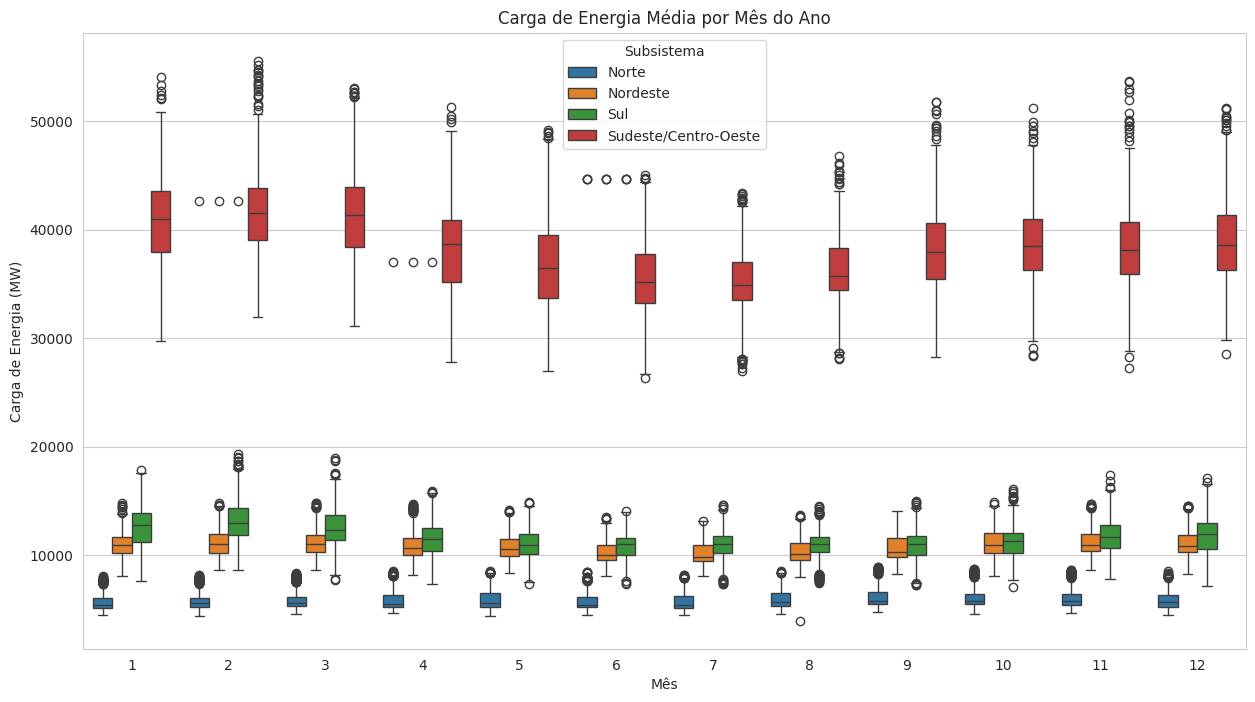

In [ ]:
df['mes'] = df.index.month
plt.figure()
sns.boxplot(data=df, x='mes', y='val_cargaenergiamwmed', hue='nom_subsistema')
plt.title('Carga de Energia Média por Mês do Ano')
plt.ylabel('Carga de Energia (MW)')
plt.xlabel('Mês')
plt.legend(title='Subsistema')
plt.show()

### Gráfico 5: Análise Sazonal - Carga Média por Dia da Semana
Mostra o padrão de consumo de energia típico dentro de uma semana. Aparentemente, não é muito significante.

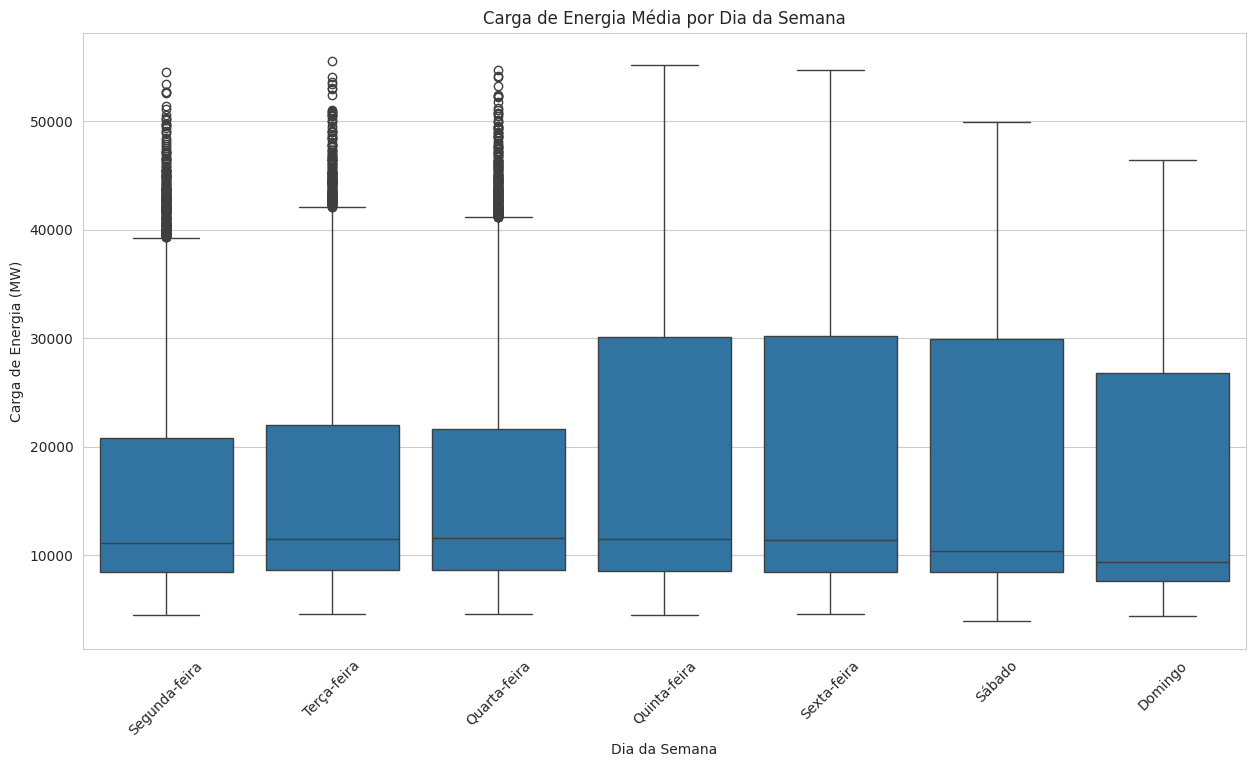

In [ ]:
df['dia_da_semana'] = df.index.day_name()
ordem_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ordem_dias_pt = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]

df['dia_da_semana'] = pd.Categorical(df['dia_da_semana'], categories=ordem_dias, ordered=True)
df_plot = df.copy()
df_plot['dia_da_semana'] = df_plot['dia_da_semana'].cat.rename_categories(ordem_dias_pt)

plt.figure()
sns.boxplot(data=df_plot, x='dia_da_semana', y='val_cargaenergiamwmed')
plt.title('Carga de Energia Média por Dia da Semana')
plt.ylabel('Carga de Energia (MW)')
plt.xlabel('Dia da Semana')
plt.xticks(rotation=45)
plt.show()

### Gráfico 6: Distribuição Geral dos Valores de Carga
Este histograma mostra a forma da distribuição dos dados, respondendo a perguntas como "Quais são os valores de carga mais comuns?".

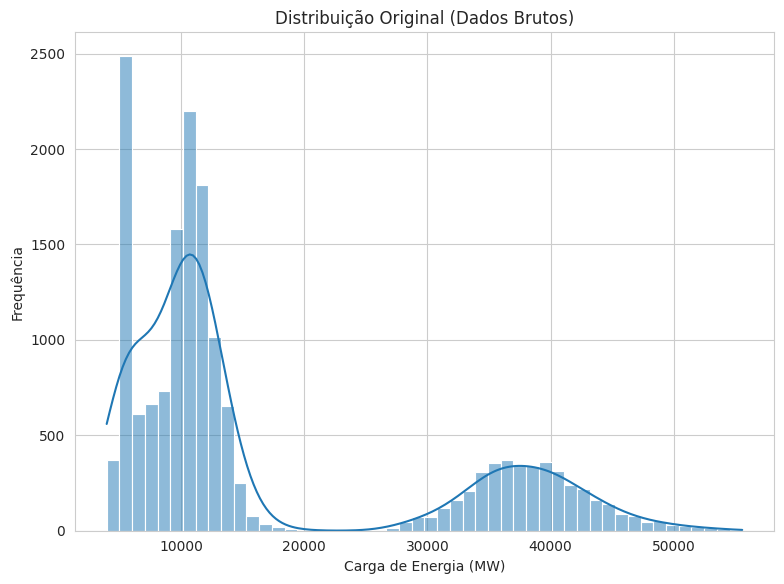

In [ ]:
# Escolha o período: 'D' (dia), 'W' (semana), 'ME' (mês)
periodo = 'D' # Definido anteriormente, pode ser mudado localmente

dados_originais = df[coluna_valor]
dados_resampled = df[coluna_valor].resample(periodo).mean()

fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # 1 linha, 1 coluna
sns.set_theme(style="whitegrid")


# --- Opção A: Mostrar a Distribuição Original ---
sns.histplot(dados_originais, kde=True, bins=50, ax=ax)
ax.set_title('Distribuição Original (Dados Brutos)')
ax.set_xlabel('Carga de Energia (MW)')
ax.set_ylabel('Frequência')


# --- Opção B: Mostrar a Distribuição Reamostrada ---
# sns.histplot(dados_resampled, kde=True, bins=20, ax=ax)
# ax.set_title(f"Distribuição Agrupada por Período ('{periodo}')")
# ax.set_xlabel(f'Carga Média por Período ({periodo}) (MW)')
# ax.set_ylabel('Frequência')


plt.tight_layout()
plt.show()

### Gráfico 7: Decomposição da Série Temporal da Carga Total
A decomposição nos permite separar a série temporal em três componentes: a tendência de longo prazo (o crescimento ou declínio geral), a sazonalidade (padrões repetitivos anuais/semanais) e os resíduos (ruído ou anomalias). Isso nos ajuda a entender as diferentes forças que influenciam a carga de energia.

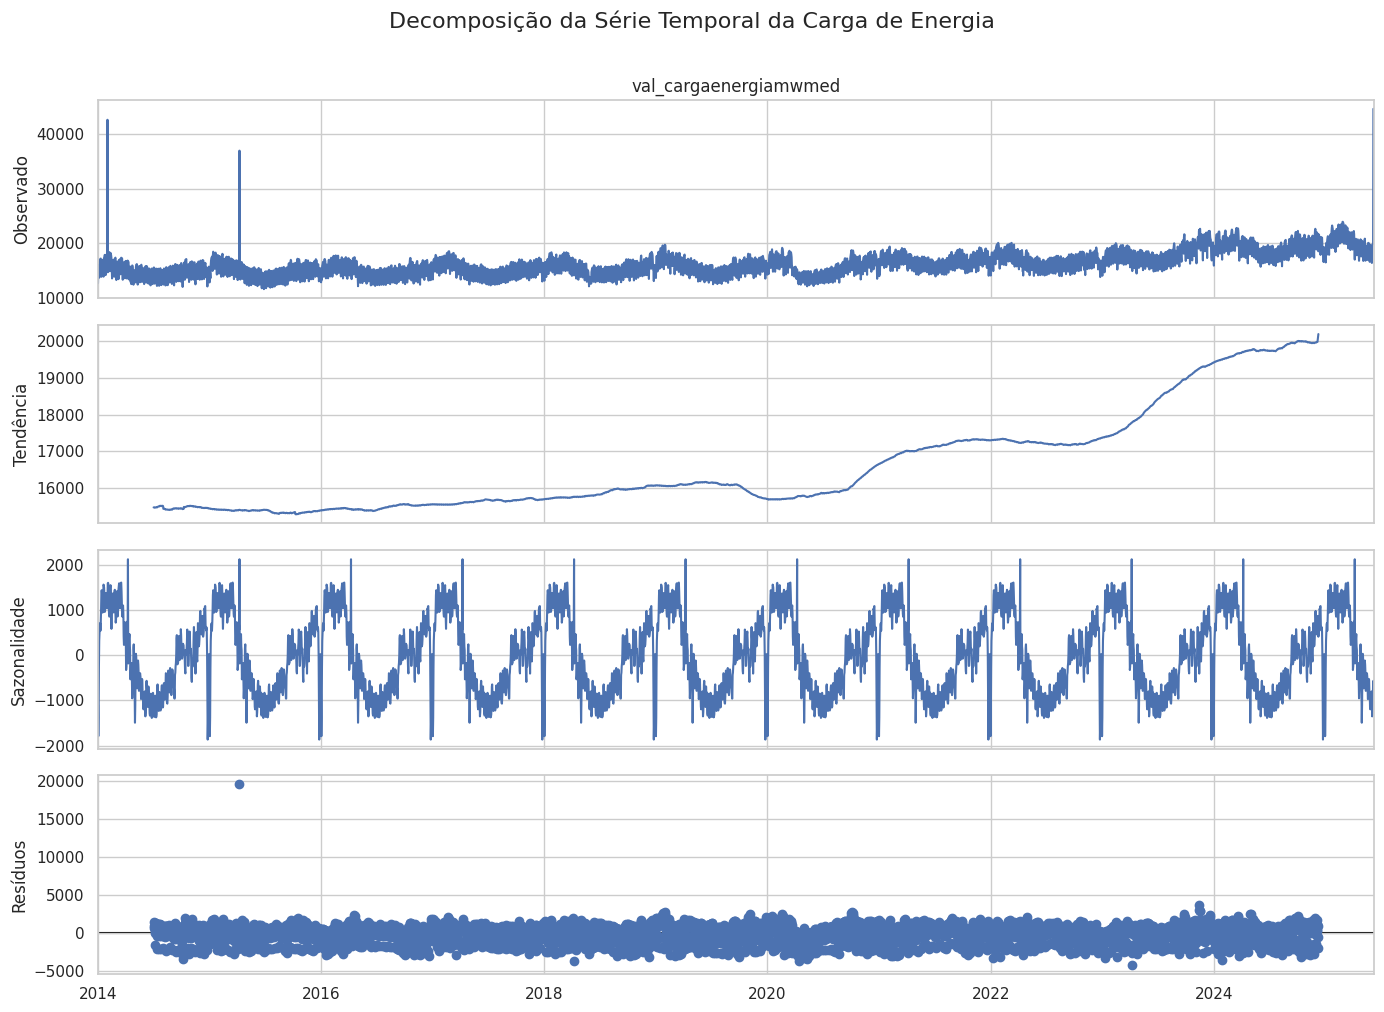

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Escolha o período: 'D' (dia), 'W' (semana) FIXME: 'ME não está funcionando
periodo = 'D'  # Definido anteriormente, pode ser mudado localmente

df_diario = df['val_cargaenergiamwmed'].resample(periodo).mean().dropna()

decomposicao = seasonal_decompose(df_diario, model='additive', period=365)

fig = decomposicao.plot()
fig.set_size_inches(14, 10)

fig.suptitle('Decomposição da Série Temporal da Carga de Energia', fontsize=16, y=1.01)
plt.gcf().get_axes()[0].set_ylabel('Observado')
plt.gcf().get_axes()[1].set_ylabel('Tendência')
plt.gcf().get_axes()[2].set_ylabel('Sazonalidade')
plt.gcf().get_axes()[3].set_ylabel('Resíduos')

plt.tight_layout()
plt.show()

### Gráfico 8: Carga por Subsistema com Média Móvel

Este gráfico melhora a visualização da série temporal por subsistema. Ao adicionar uma média móvel, suavizamos as flutuações diárias e tornamos as tendências de longo prazo e as anomalias mais fáceis de identificar para cada região.

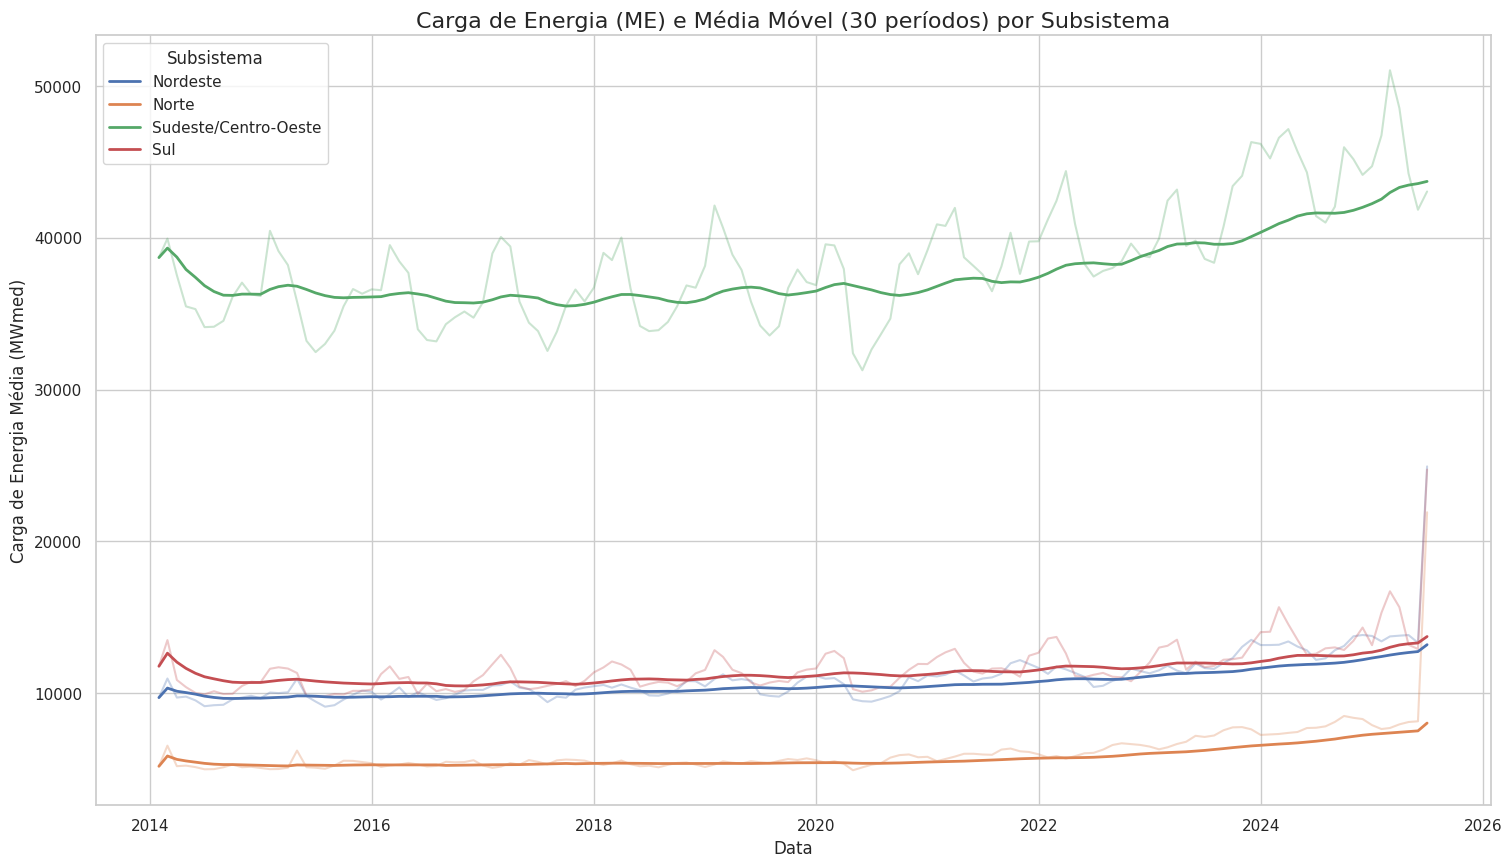

In [ ]:
# Escolha o período: 'D' (dia), 'W' (semana), 'ME' (mês)
periodo = 'ME'  # Definido anteriormente, pode ser mudado localmente

df_diario = df.groupby([pd.Grouper(freq=periodo), coluna_subsistema])[coluna_valor].mean().reset_index()

nome_coluna_data = df_diario.columns[0]
df_diario = df_diario.sort_values(by=[coluna_subsistema, nome_coluna_data])
df_diario['media_movel_30d'] = df_diario.groupby(coluna_subsistema)[coluna_valor] \
                                        .transform(lambda x: x.rolling(window=30, min_periods=1).mean())

plt.figure(figsize=(18, 10))

sns.lineplot(data=df_diario, x=nome_coluna_data, y=coluna_valor, hue=coluna_subsistema, alpha=0.3, legend=False)
sns.lineplot(data=df_diario, x=nome_coluna_data, y='media_movel_30d', hue=coluna_subsistema, linewidth=2)

plt.title(f'Carga de Energia ({periodo}) e Média Móvel (30 períodos) por Subsistema', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Carga de Energia Média (MWmed)', fontsize=12)
plt.legend(title='Subsistema')
plt.grid(True)
plt.show()

# Task
Analise dos dados de consumo de energia em "dados_carga.csv" utilizando modelos de séries temporais (Regressão Linear, Random Forest e Prophet). Avaliação do desempenho de cada modelo usando as métricas RMSE e MAPE.

## Preparação dos dados para modelagem

### Subtask:
Preparação dos dados para serem usados pelos modelos de séries temporais. Isso inclui a criação de variáveis de data/hora (como ano, mês, dia da semana) e, se necessário, a divisão dos dados em conjuntos de treino e teste.


In [ ]:
# 1. Create new date/time features
df['ano'] = df.index.year
df['mes'] = df.index.month
df['dia_do_ano'] = df.index.dayofyear
df['dia_da_semana'] = df.index.dayofweek # Monday=0, Sunday=6
df['trimestre'] = df.index.quarter

# 2. Create 'semana_do_ano' feature
df['semana_do_ano'] = df.index.isocalendar().week.astype(int)


# 3. Split data into training and testing sets
train_df = df[(df['ano'] >= 2014) & (df['ano'] <= 2023)]
test_df = df[df['ano'] == 2024]

print("Shape of training data:", train_df.shape)
print("Shape of testing data:", test_df.shape)

# 4. Separate features and target for train and test sets
features = ['ano', 'mes', 'dia_do_ano', 'dia_da_semana', 'trimestre', 'semana_do_ano', 'nom_subsistema']
target = 'val_cargaenergiamwmed'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

print("\nTraining Features (X_train) head:")
display(X_train.head())
print("\nTraining Target (y_train) head:")
display(y_train.head())
print("\nTesting Features (X_test) head:")
display(X_test.head())
print("\nTesting Target (y_test) head:")
display(y_test.head())

Shape of training data: (14608, 9)
Shape of testing data: (1464, 9)

Training Features (X_train) head:


/tmp/ipython-input-4-3398617686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ano'] = df.index.year
/tmp/ipython-input-4-3398617686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df.index.month
/tmp/ipython-input-4-3398617686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,ano,mes,dia_do_ano,dia_da_semana,trimestre,semana_do_ano,nom_subsistema
din_instante,,,,,,,
2014-01-01,2014,1,1,2,1,1,Norte
2014-01-01,2014,1,1,2,1,1,Nordeste
2014-01-01,2014,1,1,2,1,1,Sul
2014-01-01,2014,1,1,2,1,1,Sudeste/Centro-Oeste
2014-01-02,2014,1,2,3,1,1,Norte



Training Target (y_train) head:


,val_cargaenergiamwmed
din_instante,
2014-01-01,4629.206875
2014-01-01,8104.899167
2014-01-01,8451.914116
2014-01-01,29770.296000
2014-01-02,5204.651667



Testing Features (X_test) head:


,ano,mes,dia_do_ano,dia_da_semana,trimestre,semana_do_ano,nom_subsistema
din_instante,,,,,,,
2024-01-01,2024,1,1,0,1,1,Norte
2024-01-01,2024,1,1,0,1,1,Nordeste
2024-01-01,2024,1,1,0,1,1,Sul
2024-01-01,2024,1,1,0,1,1,Sudeste/Centro-Oeste
2024-01-02,2024,1,2,1,1,1,Norte



Testing Target (y_test) head:


,val_cargaenergiamwmed
din_instante,
2024-01-01,6532.986042
2024-01-01,11658.740083
2024-01-01,10472.403292
2024-01-01,35089.386708
2024-01-02,7154.334333


## Modelagem com regressão linear

### Subtask:
Implementação um modelo de regressão linear para prever a carga de energia.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical features
categorical_features = ['nom_subsistema']

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

# Create a pipeline with the preprocessor and the Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions_lr = model.predict(X_test)

print("Linear Regression model trained and predictions made.")

print(predictions_lr)

Linear Regression model trained and predictions made.
[ 8573.91803697 13435.31845813 14165.03048652 ... 11517.8703011
 12247.58232948 38416.54143294]


## Modelagem com random forest

### Subtask:
Implementação um modelo Random Forest para prever a carga de energia.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Reutilize the preprocessor created in the previous step
# preprocessor is already defined and contains the OneHotEncoder

# Create a pipeline combining the preprocessor and the RandomForestRegressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the pipeline using the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
predictions_rf = model_rf.predict(X_test)

print("Random Forest model trained and predictions made.")
print(predictions_rf)

Random Forest model trained and predictions made.
[ 6221.17811292 11138.84152    12320.44531958 ... 10760.4500625
  9625.44295265 34218.196065  ]


## Modelagem Prophet

Dados de treino para Prophet preparados (média diária agregada). Amostra:


,ds,y
0,2014-01-01,12739.079039
1,2014-01-02,15393.787554
2,2014-01-03,15967.095692
3,2014-01-04,14999.150478
4,2014-01-05,13748.479322



Iniciando o treinamento do modelo Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/dovg67f8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/mx717kz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20353', 'data', 'file=/tmp/tmpnusqqo7t/dovg67f8.json', 'init=/tmp/tmpnusqqo7t/mx717kz4.json', 'output', 'file=/tmp/tmpnusqqo7t/prophet_model558ranaz/prophet_model-20250623184110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo treinado com sucesso!

Verificando previsões do Prophet:
          ds          yhat
0 2024-01-01  18900.492245
1 2024-01-02  19425.378289
2 2024-01-03  19573.844325
3 2024-01-04  19679.995338
4 2024-01-05  19569.208821

Previsões do Prophet geradas (contém valores não-NaN).
Previsões do Prophet realizadas e alinhadas com a média diária dos dados de teste.


,ds,val_cargaenergiamwmed,yhat
0,2024-01-01,15938.379031,18900.492245
1,2024-01-02,18525.232302,19425.378289
2,2024-01-03,19493.070083,19573.844325
3,2024-01-04,19551.246750,19679.995338
4,2024-01-05,19588.225562,19569.208821



Contagem de NaNs no DataFrame unido antes de dropar:
ds                       0
val_cargaenergiamwmed    0
yhat                     0
dtype: int64

--- Métricas de Erro (Prophet no conjunto de teste) ---
MAE (Erro Absoluto Médio): 630.02
RMSE (Raiz do Erro Quadrático Médio): 836.88
MAPE (Erro Percentual Absoluto Médio): 0.0321

Gerando gráfico de resultados (Prophet vs Média Diária Real)...


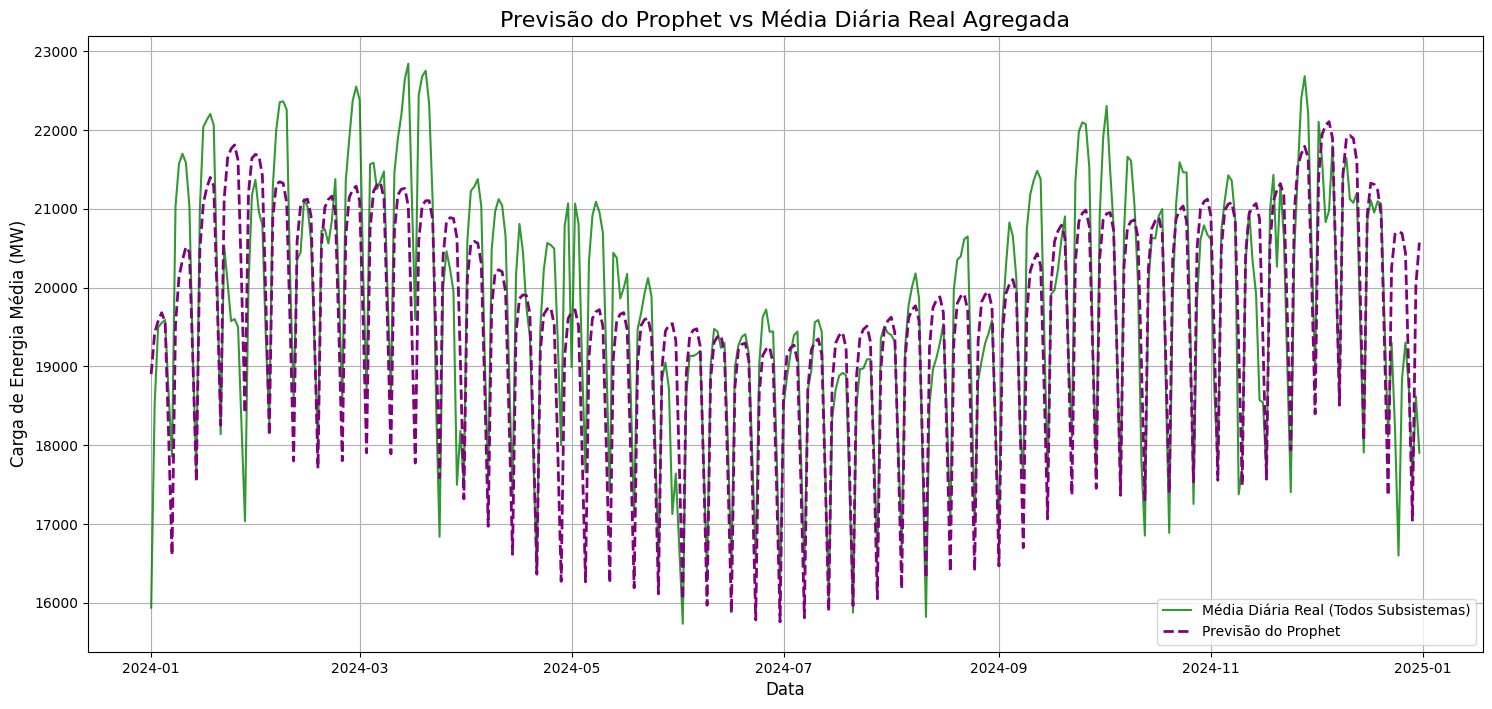

In [ ]:
# --- 1. Importação das Bibliotecas ---
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- 2. Preparação dos Dados para o Formato do Prophet ---
# Usar os DataFrames train_df e test_df já preparados nas células anteriores.
# NOTA: O Prophet funciona melhor com uma única série temporal.
# Este código aplicará o Prophet aos dados combinados de todos os subsistemas no treino.
# Para prever por subsistema individualmente, seria necessário filtrar ou iterar.

# Substitua 'val_cargaenergiamwmed' pelo nome da sua coluna de carga de energia, se for diferente.
NOME_COLUNA_CARGA = 'val_cargaenergiamwmed'

# Preparar os dados de treino para o formato do Prophet
# Resetar o índice para que a data se torne uma coluna
# Ao agrupar por data e calcular a média, criamos uma única série temporal diária
df_prophet_train = train_df.reset_index().groupby('din_instante')[NOME_COLUNA_CARGA].mean().reset_index().rename(columns={
    'din_instante': 'ds', # Renomear a coluna de data para 'ds'
    NOME_COLUNA_CARGA: 'y' # Renomear a coluna de valor para 'y'
})

# Certificar-se de que 'ds' é datetime simples para o Prophet
df_prophet_train['ds'] = pd.to_datetime(df_prophet_train['ds']).dt.normalize()


print(f"Dados de treino para Prophet preparados (média diária agregada). Amostra:")
display(df_prophet_train.head())


# --- 3. Treinamento do Modelo Prophet (COM AJUSTE) ---
print("\nIniciando o treinamento do modelo Prophet...")

# Inicializamos o modelo com os parâmetros que corrigem a tendência rígida
# Ajustes baseados na discussão anterior e na necessidade de sazonalidade diária
model_prophet_tuned = Prophet(
    changepoint_prior_scale=0.1,      # Aumenta a flexibilidade da tendência (ajustado)
    seasonality_mode='multiplicative',# Sazonalidade multiplicativa costuma ser melhor para séries com variações proporcionais
    yearly_seasonality=True,          # Garante que a sazonalidade anual está ativa
    weekly_seasonality=True,          # Garante que a sazonalidade semanal está ativa
    daily_seasonality=True            # Ativar sazonalidade diária, pois os dados são diários
)

# Treinamos o modelo APENAS com os dados de treino preparados para Prophet
model_prophet_tuned.fit(df_prophet_train)

print("Modelo treinado com sucesso!")


# --- 4. Realização da Previsão ---
# Para avaliação, precisamos alinhar as previsões com os valores reais do test_df
# A previsão do Prophet ('yhat') corresponde às datas em 'ds'.
# O test_df original tem os valores reais indexados pela data e por subsistema.
# Para comparar com a previsão única do Prophet por data, vamos calcular a média diária
# dos valores reais no conjunto de teste.

y_test_daily_mean = y_test.reset_index().groupby('din_instante')[NOME_COLUNA_CARGA].mean().reset_index().rename(columns={'din_instante': 'ds'})

# Certificar-se de que 'ds' é datetime simples em y_test_daily_mean
y_test_daily_mean['ds'] = pd.to_datetime(y_test_daily_mean['ds']).dt.normalize()


# Crie o DataFrame 'future' DIRETAMENTE das datas em y_test_daily_mean
future = y_test_daily_mean[['ds']].copy()

# FAZEMOS A PREVISÃO USANDO O MODELO TREINADO: 'model_prophet_tuned'
forecast = model_prophet_tuned.predict(future)

# Certificar-se de que 'ds' é datetime simples no forecast
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.normalize()


# --- VERIFICAÇÃO ADICIONAL: Verificar se o forecast contém NaNs ---
print("\nVerificando previsões do Prophet:")
print(forecast[['ds', 'yhat']].head())
if forecast['yhat'].isnull().all():
    print("\nERRO: O Prophet gerou apenas valores NaN nas previsões ('yhat'). Não é possível avaliar.")
else:
    print("\nPrevisões do Prophet geradas (contém valores não-NaN).")

    # Juntar os valores reais médios diários de teste com as previsões do Prophet
    # Agora que future veio de y_test_daily_mean, as datas devem alinhar perfeitamente
    results_prophet = pd.merge(y_test_daily_mean, forecast[['ds', 'yhat']], on='ds', how='left')

    print("Previsões do Prophet realizadas e alinhadas com a média diária dos dados de teste.")
    display(results_prophet.head())

    # --- VERIFICAÇÃO ADICIONAL: Onde estão os NaNs no DataFrame unido? ---
    print("\nContagem de NaNs no DataFrame unido antes de dropar:")
    print(results_prophet.isnull().sum())


    # --- 5. Avaliação Numérica do Modelo ---
    # Calcular métricas no conjunto de teste alinhado
    # Verificar se há NaNs após o merge (deve ser raro se as datas coincidirem)
    if results_prophet.isnull().sum().sum() > 0:
        print("\nAviso: NaNs encontrados nos dados de avaliação após o merge. Removendo linhas com NaNs para cálculo das métricas.")
        results_prophet = results_prophet.dropna()

    # Certificar-se de que não há NaNs antes de calcular as métricas
    if results_prophet.empty:
        print("\nERRO: O DataFrame de resultados do Prophet está vazio após remover NaNs. Não é possível calcular métricas.")
    else:
        # Import mean_absolute_percentage_error if not already imported (should be)
        from sklearn.metrics import mean_absolute_percentage_error

        mae = mean_absolute_error(results_prophet[NOME_COLUNA_CARGA], results_prophet['yhat'])
        rmse = np.sqrt(mean_squared_error(results_prophet[NOME_COLUNA_CARGA], results_prophet['yhat']))
        mape = mean_absolute_percentage_error(results_prophet[NOME_COLUNA_CARGA], results_prophet['yhat'])


        print("\n--- Métricas de Erro (Prophet no conjunto de teste) ---")
        print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
        print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
        print(f"MAPE (Erro Percentual Absoluto Médio): {mape:.4f}")


        # --- 6. Visualização dos Resultados ---
        print("\nGerando gráfico de resultados (Prophet vs Média Diária Real)...")

        # Plotar a média diária real de todos os subsistemas contra a previsão do Prophet.
        plt.figure(figsize=(18, 8))
        plt.plot(results_prophet['ds'], results_prophet[NOME_COLUNA_CARGA], label='Média Diária Real (Todos Subsistemas)', color='green', alpha=0.8)
        plt.plot(results_prophet['ds'], results_prophet['yhat'], label='Previsão do Prophet', color='purple', linestyle='--', linewidth=2)

        plt.title('Previsão do Prophet vs Média Diária Real Agregada', fontsize=16)
        plt.xlabel('Data', fontsize=12)
        plt.ylabel('Carga de Energia Média (MW)', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
print(y_test_daily_mean)

            ds  val_cargaenergiamwmed
0   2024-01-01           15938.379031
1   2024-01-02           18525.232302
2   2024-01-03           19493.070083
3   2024-01-04           19551.246750
4   2024-01-05           19588.225562
..         ...                    ...
361 2024-12-27           19301.000594
362 2024-12-28           18698.854708
363 2024-12-29           17557.001167
364 2024-12-30           18619.709531
365 2024-12-31           17902.168010

[366 rows x 2 columns]


In [ ]:
# ANTES de iniciar o loop 'for regiao in regioes:'
print("Unificando X_train e y_train para facilitar a filtragem...")
train_df = pd.concat([X_train, y_train], axis=1)
display(train_df.head())

Unificando X_train e y_train para facilitar a filtragem...


,ano,mes,dia_do_ano,dia_da_semana,trimestre,semana_do_ano,nom_subsistema,val_cargaenergiamwmed
din_instante,,,,,,,,
2014-01-01,2014,1,1,2,1,1,Norte,4629.206875
2014-01-01,2014,1,1,2,1,1,Nordeste,8104.899167
2014-01-01,2014,1,1,2,1,1,Sul,8451.914116
2014-01-01,2014,1,1,2,1,1,Sudeste/Centro-Oeste,29770.296000
2014-01-02,2014,1,2,3,1,1,Norte,5204.651667


Unificando X_train e y_train...
Transformando o índice 'din_instante' em uma coluna...
Unificando X_test e y_test...

Amostra do DataFrame de treino unificado:


,din_instante,ano,mes,dia_do_ano,dia_da_semana,trimestre,semana_do_ano,nom_subsistema,val_cargaenergiamwmed
0,2014-01-01,2014,1,1,2,1,1,Norte,4629.206875
1,2014-01-01,2014,1,1,2,1,1,Nordeste,8104.899167
2,2014-01-01,2014,1,1,2,1,1,Sul,8451.914116
3,2014-01-01,2014,1,1,2,1,1,Sudeste/Centro-Oeste,29770.296000
4,2014-01-02,2014,1,2,3,1,1,Norte,5204.651667



======================= INICIANDO REGIÃO: Norte =======================

Amostra dos dados de treino formatados para Prophet (Norte):


,ds,y
0,2014-01-01,4629.206875
1,2014-01-02,5204.651667
2,2014-01-03,5394.634958
3,2014-01-04,5255.969417
4,2014-01-05,4979.701708



Iniciando o treinamento do modelo Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/wj5hexny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/dog3gyv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43035', 'data', 'file=/tmp/tmpnusqqo7t/wj5hexny.json', 'init=/tmp/tmpnusqqo7t/dog3gyv1.json', 'output', 'file=/tmp/tmpnusqqo7t/prophet_modelgu_j45ao/prophet_model-20250623184131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo treinado com sucesso!

--- Métricas de Erro (Norte) ---
MAE (Erro Absoluto Médio):       218.18
RMSE (Raiz do Erro Quadrático Médio): 282.92
MAPE (Erro Percentual Absoluto Médio):  0.0287
Gerando gráfico de resultados...


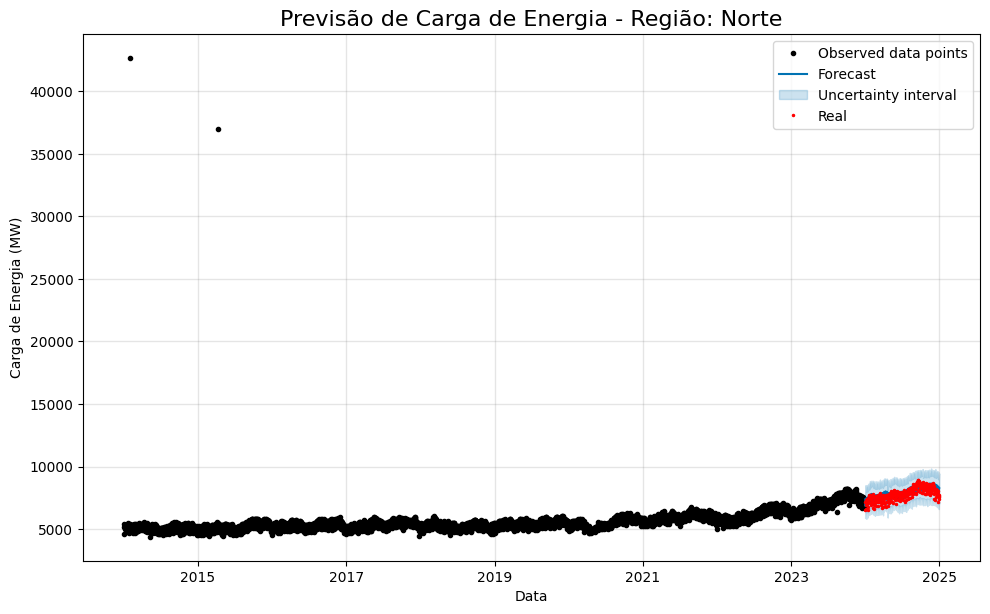


======================= INICIANDO REGIÃO: Nordeste =======================

Amostra dos dados de treino formatados para Prophet (Nordeste):


,ds,y
0,2014-01-01,8104.899167
1,2014-01-02,9428.029750
2,2014-01-03,9742.567375
3,2014-01-04,9437.889000
4,2014-01-05,8863.988250


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/31p5m3a0.json



Iniciando o treinamento do modelo Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/tkdqrwkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37364', 'data', 'file=/tmp/tmpnusqqo7t/31p5m3a0.json', 'init=/tmp/tmpnusqqo7t/tkdqrwkw.json', 'output', 'file=/tmp/tmpnusqqo7t/prophet_modelg0xl35q9/prophet_model-20250623184134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo treinado com sucesso!

--- Métricas de Erro (Nordeste) ---
MAE (Erro Absoluto Médio):       340.62
RMSE (Raiz do Erro Quadrático Médio): 435.17
MAPE (Erro Percentual Absoluto Médio):  0.0255
Gerando gráfico de resultados...


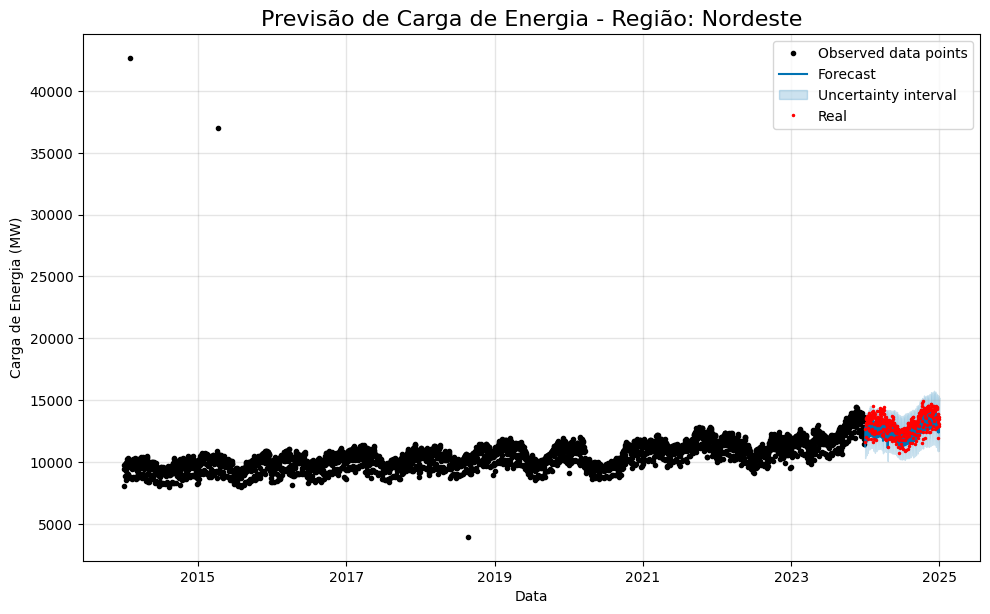


======================= INICIANDO REGIÃO: Sul =======================

Amostra dos dados de treino formatados para Prophet (Sul):


,ds,y
0,2014-01-01,8451.914116
1,2014-01-02,10377.181634
2,2014-01-03,10431.450811
3,2014-01-04,9028.460955
4,2014-01-05,8201.228205



Iniciando o treinamento do modelo Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/tx96amxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/m6d48u3t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52995', 'data', 'file=/tmp/tmpnusqqo7t/tx96amxr.json', 'init=/tmp/tmpnusqqo7t/m6d48u3t.json', 'output', 'file=/tmp/tmpnusqqo7t/prophet_modelui96ihke/prophet_model-20250623184143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo treinado com sucesso!

--- Métricas de Erro (Sul) ---
MAE (Erro Absoluto Médio):       837.73
RMSE (Raiz do Erro Quadrático Médio): 1095.21
MAPE (Erro Percentual Absoluto Médio):  0.0595
Gerando gráfico de resultados...


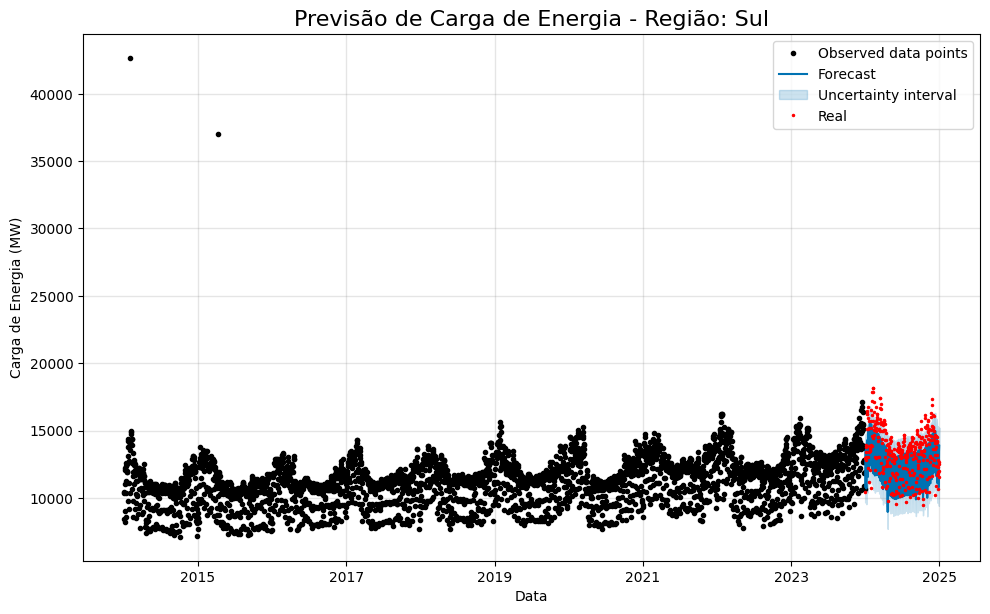


======================= INICIANDO REGIÃO: Sudeste/Centro-Oeste =======================

Amostra dos dados de treino formatados para Prophet (Sudeste/Centro-Oeste):


,ds,y
0,2014-01-01,29770.296000
1,2014-01-02,36565.287167
2,2014-01-03,38299.729625
3,2014-01-04,36274.282542
4,2014-01-05,32948.999125



Iniciando o treinamento do modelo Prophet...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/w_kpwj7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnusqqo7t/ynw1t_f3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27439', 'data', 'file=/tmp/tmpnusqqo7t/w_kpwj7w.json', 'init=/tmp/tmpnusqqo7t/ynw1t_f3.json', 'output', 'file=/tmp/tmpnusqqo7t/prophet_modelf41bfjx1/prophet_model-20250623184149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:41:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo treinado com sucesso!

--- Métricas de Erro (Sudeste/Centro-Oeste) ---
MAE (Erro Absoluto Médio):       1851.72
RMSE (Raiz do Erro Quadrático Médio): 2344.32
MAPE (Erro Percentual Absoluto Médio):  0.0416
Gerando gráfico de resultados...


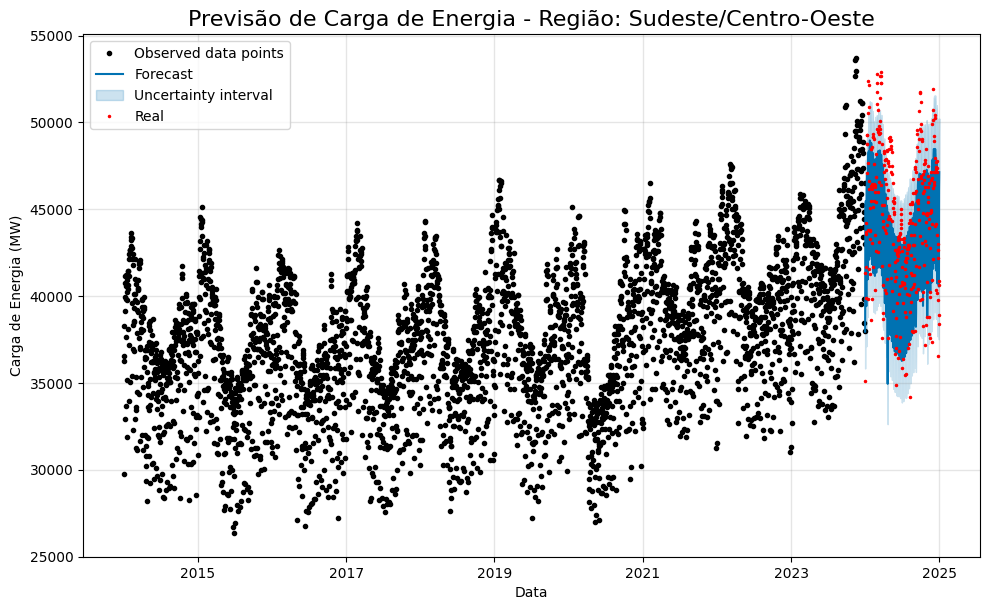


======================= RESUMO FINAL DAS MÉTRICAS POR REGIÃO =======================


,MAE,RMSE,MAPE
Norte,218.182626,282.924597,0.028734
Nordeste,340.621576,435.168872,0.025549
Sul,837.732469,1095.205494,0.059544
Sudeste/Centro-Oeste,1851.717878,2344.315856,0.041565


In [ ]:
# --- 1. Importação das Bibliotecas ---
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# --- 2. Definir nome da coluna da variável alvo ---
NOME_COLUNA_CARGA = 'val_cargaenergiamwmed'

# --- 3. Unificação e Preparação dos Dados (Passo Crucial) ---
# O objetivo aqui é evitar erros de alinhamento e KeyErrors.

# Junte as features (X) e o alvo (y) em um único DataFrame para treino
print("Unificando X_train e y_train...")
train_df = pd.concat([X_train, y_train], axis=1)

# Transforme o índice 'din_instante' em uma coluna para que possamos usá-lo.
print("Transformando o índice 'din_instante' em uma coluna...")
train_df = train_df.reset_index()

# Faça exatamente o mesmo para o conjunto de teste
print("Unificando X_test e y_test...")
test_df = pd.concat([X_test, y_test], axis=1)
test_df = test_df.reset_index()

# Verifique a estrutura final dos DataFrames preparados
print("\nAmostra do DataFrame de treino unificado:")
display(train_df.head())


# --- 4. Loop de Treinamento e Avaliação por Região ---

# Obter lista única de regiões a partir do DataFrame de treino
regioes = train_df['nom_subsistema'].unique()

# Dicionário para armazenar as métricas de cada modelo regional
metrics_by_region = {}

for regiao in regioes:
    print(f"\n======================= INICIANDO REGIÃO: {regiao} =======================")

    # --- A. Preparar os dados de treino para o Prophet ---

    # 1. Filtra o DataFrame UNIFICADO para a região atual
    train_df_regiao = train_df[train_df['nom_subsistema'] == regiao].copy()

    # Verificação para pular regiões sem dados de treino
    if train_df_regiao.empty:
        print(f"AVISO: Não há dados de treino para a região {regiao}. Pulando...")
        continue

    # 2. Prepara o DataFrame no formato que o Prophet exige ('ds', 'y')
    df_prophet_train = train_df_regiao[['din_instante', NOME_COLUNA_CARGA]].copy()
    df_prophet_train = df_prophet_train.rename(columns={
        'din_instante': 'ds',
        NOME_COLUNA_CARGA: 'y'
    })

    # Garante que 'ds' é do tipo datetime e ordena os dados (boa prática)
    df_prophet_train['ds'] = pd.to_datetime(df_prophet_train['ds'])
    df_prophet_train = df_prophet_train.sort_values('ds').reset_index(drop=True)

    print(f"\nAmostra dos dados de treino formatados para Prophet ({regiao}):")
    display(df_prophet_train.head())

    # --- B. Inicializar e Treinar o Modelo Prophet ---
    print("\nIniciando o treinamento do modelo Prophet...")

    # Nota: 'additive' é geralmente um bom ponto de partida para carga de energia.
    # Você pode testar 'multiplicative' para ver se melhora os resultados.
    model_prophet = Prophet(
        changepoint_prior_scale=0.1,
        seasonality_mode='additive',
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True
    )

    # Adicionar feriados do Brasil é crucial para este tipo de previsão
    model_prophet.add_country_holidays(country_name='BR')

    model_prophet.fit(df_prophet_train)
    print("Modelo treinado com sucesso!")

    # --- C. Preparar Dados de Teste e Fazer a Previsão ---

    # Filtra o DataFrame de teste unificado para a região atual
    test_df_regiao = test_df[test_df['nom_subsistema'] == regiao].copy()

    if test_df_regiao.empty:
        print(f"AVISO: Não há dados de teste para a região {regiao}. Pulando avaliação.")
        continue

    # Cria o DataFrame 'future' com as datas exatas do conjunto de teste
    future_regiao = test_df_regiao[['din_instante']].copy().rename(columns={'din_instante': 'ds'})
    future_regiao['ds'] = pd.to_datetime(future_regiao['ds'])

    # Faz a previsão para as datas futuras
    forecast_regiao = model_prophet.predict(future_regiao)

    # --- D. Avaliar o Modelo ---

    # Junta os valores reais de teste com as previsões para calcular o erro
    results_df = pd.merge(
        test_df_regiao.rename(columns={'din_instante': 'ds', NOME_COLUNA_CARGA: 'y'})[['ds', 'y']],
        forecast_regiao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],
        on='ds',
        how='left'
    )

    # Remove quaisquer linhas que não puderam ser previstas
    results_df = results_df.dropna()

    if results_df.empty:
        print(f"ERRO: Nenhum dado válido para avaliação na região {regiao}.")
        continue

    # Calcular as métricas de erro
    mae = mean_absolute_error(results_df['y'], results_df['yhat'])
    rmse = np.sqrt(mean_squared_error(results_df['y'], results_df['yhat']))
    mape = mean_absolute_percentage_error(results_df['y'], results_df['yhat'])

    # Armazenar métricas para o resumo final
    metrics_by_region[regiao] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    print(f"\n--- Métricas de Erro ({regiao}) ---")
    print(f"MAE (Erro Absoluto Médio):       {mae:.2f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
    print(f"MAPE (Erro Percentual Absoluto Médio):  {mape:.4f}")

    # --- E. Visualização dos Resultados ---
    print("Gerando gráfico de resultados...")

    # O Prophet pode plotar o forecast diretamente, o que é muito conveniente
    fig = model_prophet.plot(forecast_regiao)
    ax = fig.gca()
    # Adiciona os pontos reais ao gráfico do Prophet
    ax.plot(results_df['ds'], results_df['y'], 'r.', markersize=3, label='Real')
    ax.set_title(f'Previsão de Carga de Energia - Região: {regiao}', fontsize=16)
    ax.set_xlabel('Data')
    ax.set_ylabel('Carga de Energia (MW)')
    plt.legend()
    plt.show()


# --- 5. Exibir Resumo Final das Métricas ---
print("\n======================= RESUMO FINAL DAS MÉTRICAS POR REGIÃO =======================")
if metrics_by_region:
    metrics_df = pd.DataFrame.from_dict(metrics_by_region, orient='index')
    display(metrics_df)
else:
    print("Nenhuma métrica foi calculada.")

In [ ]:
results_df

,ds,y,yhat,yhat_lower,yhat_upper
0,2024-01-01,35089.386708,37949.768929,35832.501840,40163.069858
1,2024-01-02,41347.517542,45013.759356,42711.485707,47302.517150
2,2024-01-03,44219.545500,45372.606286,42969.780231,47581.038242
3,2024-01-04,43571.449042,45475.098422,43175.313481,47852.862822
4,2024-01-05,43669.790083,45478.621807,43258.311045,47777.990030
...,...,...,...,...,...
361,2024-12-27,42676.106292,46949.400966,43902.446665,50187.498659
362,2024-12-28,40868.816250,43735.960798,40734.051615,46833.315634
363,2024-12-29,38391.941083,40554.396269,37511.868750,43622.868521
364,2024-12-30,40618.372208,46105.032662,43274.982460,49404.062030


In [ ]:
print(mape)

x = results_df['y']
y = results_df['yhat']

def calcular_mape(y_true, y_pred):
    """
    Calcula o MAPE (Mean Absolute Percentage Error) entre duas listas.

    Parâmetros:
    y_true -- lista com os valores reais
    y_pred -- lista com os valores previstos

    Retorna:
    MAPE em porcentagem
    """
    if len(y_true) != len(y_pred):
        raise ValueError("As listas devem ter o mesmo tamanho.")

    erro_percentual_total = 0
    n = len(y_true)

    for real, previsto in zip(y_true, y_pred):
        if real == 0:
            continue  # Evita divisão por zero
        erro_percentual = abs((real - previsto) / real)
        print(f"Real: {real}, Previsto: {previsto}, Erro Percentual: {erro_percentual}")
        erro_percentual_total += erro_percentual

    mape = (erro_percentual_total / n) * 100
    return mape


mape = calcular_mape(x, y)
print(f"MAPE: {mape:.2f}%")



4.156522882554601
Real: 35089.38670833, Previsto: 37949.7689292213, Erro Percentual: 0.08151701950984135
Real: 41347.51754167, Previsto: 45013.75935649831, Erro Percentual: 0.08866897054057657
Real: 44219.5455, Previsto: 45372.60628621553, Erro Percentual: 0.026075817224659858
Real: 43571.44904167, Previsto: 45475.0984217067, Erro Percentual: 0.043690293114101574
Real: 43669.79008333, Previsto: 45478.62180671278, Erro Percentual: 0.04142066448982678
Real: 41671.46645833, Previsto: 42437.47444285443, Erro Percentual: 0.018382074105561266
Real: 39885.6, Previsto: 39419.049772502345, Erro Percentual: 0.011697209707203938
Real: 47088.04725, Previsto: 45120.66182115461, Erro Percentual: 0.04178099419583374
Real: 48753.35779167, Previsto: 46289.38586542255, Erro Percentual: 0.05053953282102854
Real: 49302.80891667, Previsto: 46740.07966506884, Erro Percentual: 0.051979376183872196
Real: 49274.867125, Previsto: 46916.67795202353, Erro Percentual: 0.047857849458918626
Real: 48741.83491667, Pre

In [ ]:
results_df['y']

,y
0,35089.386708
1,41347.517542
2,44219.545500
3,43571.449042
4,43669.790083
...,...
361,42676.106292
362,40868.816250
363,38391.941083
364,40618.372208


In [ ]:
# Create future DataFrame for predictions using test data dates
# Using X_test as it contains the original test dates and subsystem info
future = X_test.reset_index()[['din_instante']].rename(columns={'din_instante': 'ds'})

# Make predictions
# Use the correctly named variable for the trained Prophet model (e.g., 'model' or 'model_prophet_tuned')
# Based on cell 3cqjLAbmE-eZ, the model for the single subsistema is 'model'.
# If you intended to use the model from MUQ76C5F_SXP, use 'model_prophet_tuned'.
# Let's use 'model' here for consistency with the latest single-subsistema analysis flow.
# Ensure the 'model' variable is the Prophet instance
if 'model' in locals() and isinstance(model, Prophet):
    forecast = model.predict(future)

    # Rename prediction column
    # Prophet's prediction is in the 'yhat' column
    predictions_prophet = forecast[['ds', 'yhat']].rename(columns={'yhat': 'predictions_prophet'})

    print("Predictions made with Prophet model.")
    display(predictions_prophet.head())
elif 'model_prophet_tuned' in locals() and isinstance(model_prophet_tuned, Prophet):
     # Fallback to model_prophet_tuned if model is not Prophet
    forecast = model_prophet_tuned.predict(future)

    # Rename prediction column
    # Prophet's prediction is in the 'yhat' column
    predictions_prophet = forecast[['ds', 'yhat']].rename(columns={'yhat': 'predictions_prophet'})

    print("Predictions made with Prophet model (using model_prophet_tuned).")
    display(predictions_prophet.head())

else:
    print("ERRO: Nenhum modelo Prophet válido ('model' ou 'model_prophet_tuned') foi encontrado. Certifique-se de que a célula onde o modelo foi treinado foi executada.")

Predictions made with Prophet model (using model_prophet_tuned).


,ds,predictions_prophet
0,2024-01-01,18900.492245
1,2024-01-01,18900.492245
2,2024-01-01,18900.492245
3,2024-01-01,18900.492245
4,2024-01-02,19425.378289
